In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [231]:
ICET_estimates = np.loadtxt("KC_results/town03_ICET_estimates.txt")
ICET_pred_stds = np.loadtxt("KC_results/town03_ICET_pred_stds.txt")
ground_truth = np.loadtxt("KC_results/town03_ground_truth.txt")

# ICET_estimates = np.loadtxt("KC_results/town07_ICET_estimates.txt")
# ICET_pred_stds = np.loadtxt("KC_results/town07_ICET_pred_stds.txt")
# ground_truth = np.loadtxt("KC_results/town07_ground_truth.txt")

<IPython.core.display.Javascript object>


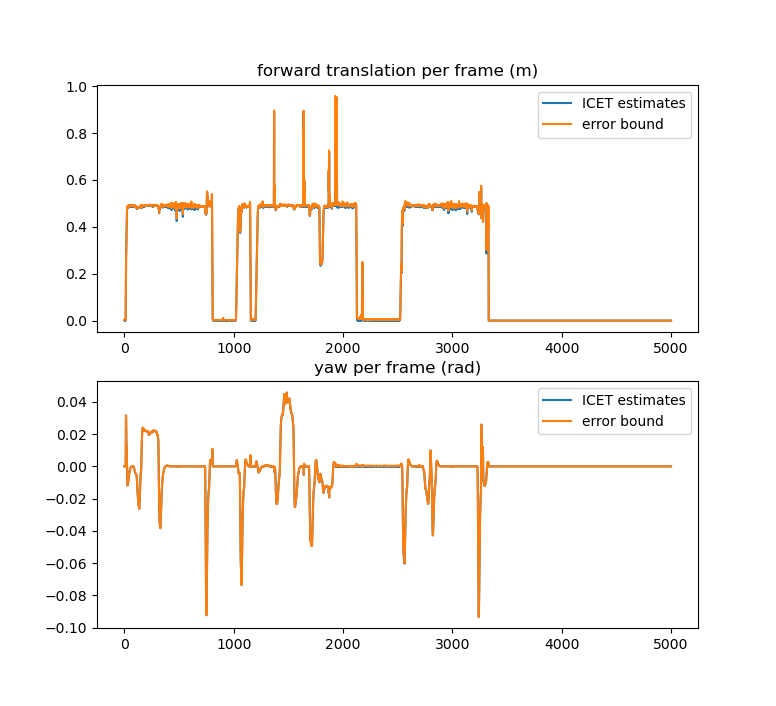

In [232]:
fig, ax = plt.subplots(2,1)

ax[0].set_title('forward translation per frame (m)')
# forward_movement = ax.plot(ICET_estimates[:,0])
forward_movement = np.sqrt(ICET_estimates[:,0]**2 + ICET_estimates[:,1]**2)
ax[0].plot(forward_movement, label = 'ICET estimates')
# ax[0].plot(ground_truth[:,0], label = 'ground truth')
ax[0].plot(2*ICET_pred_stds[:,0] + forward_movement, label = 'error bound')
ax[0].legend(loc = 'best')

ax[1].set_title('yaw per frame (rad)')
ax[1].plot(ICET_estimates[:,5], label = 'ICET estimates')
ax[1].plot(ICET_estimates[:,5] + 2*ICET_pred_stds[:,5], label = 'error bound' )
ax[1].legend(loc = 'best')